# Problem Statement:
-The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.

## Data Collection
- Dataset Source: https://www.kaggle.com/datasets/overload10/adult-census-dataset

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">1. EDA for Adult Income Dataset</p>

 ## Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/income.csv')

In [3]:
#Show Top 10 Records
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
#Shape of dataset
df.shape

(32561, 15)

## Dataset information

_The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete list of variables is as follows:

   - Age => The age of individual
   - Workclass => working status of person, which sector does he/she work in.
   - Final Weight =>
   - Education => Level of education
   - Education Number of Years.
   - Marital-status => marital status of person
   - Occupation => type of work the individual does
   - Relationship =>relationship of individual to his/her household
   - Race => The individual's rac
   - Sex => Gender(male or female)
   - Capital-gain => The capital gain of individual(from selling an asset such as a stock or bond for more than original     purchase)
   - Capital-loss =>The capital loss of individual(from selling an asset such as a stock or bond for less than original     purchase)
   - Hours-per-week => The numbers of hours individual works per week
   - country => The native country of individual
   - salary => the outcome variable indicating person salary status


### Check Missing values

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

#### Check Duplicates

In [6]:
df.duplicated().sum()

24

In [7]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking the number of unique values of each column

In [9]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

### Check statistics of data set

In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. There's no missing data as all counts are same.
2. There is presence of outliers in the dataset in various columns.
3. There data has skewness too.



### Distinct column values

In [11]:
for i in df.columns:
    print(i, ':\n', df[i].unique())

age :
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt :
 [ 77516  83311 215646 ...  34066  84661 257302]
education :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num :
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming

- We can observe that the workclass,occupation & country column has '?' values which means none.


### Amount of wrong column values in the dataset.

In [12]:
for i,j in zip(df.columns,(df.values.astype(str) == ' ?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')



workclass: 1836 records
occupation: 1843 records
country: 583 records


In [13]:
df = pd.read_csv('data/income.csv',na_values=[" ?"]) 

In [14]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [15]:
df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])
df["workclass"] = df["workclass"].fillna(df["workclass"].mode()[0])
df["country"] = df["country"].fillna(df["country"].mode()[0])

In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

### Exploring Data

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: >

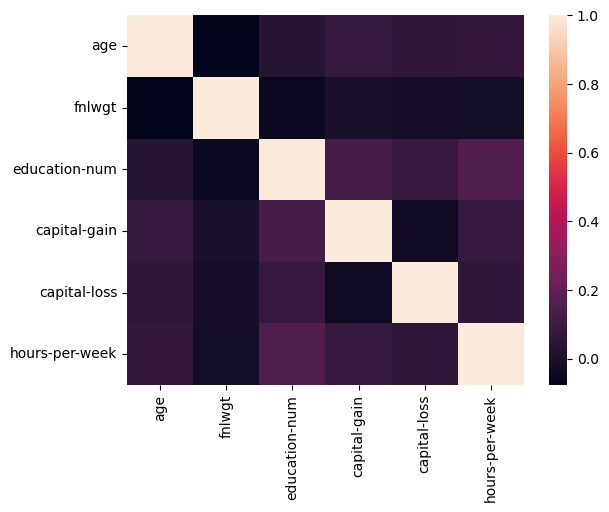

In [18]:
#Checking correlation

sns.heatmap(df.corr())

In [19]:
print("Categories in 'workclass' variable:     ",end=" " )
print(df['workclass'].unique())

print("Categories in 'education' variable:     ",end=" " )
print(df['education'].unique())

print("Categories in 'occupation' variable:     ",end=" " )
print(df['occupation'].unique())

print("Categories in 'marital Status' variable:     ",end=" " )
print(df['occupation'].unique())

print("Categories in 'race' variable:     ",end=" " )
print(df['race'].unique())


Categories in 'workclass' variable:      [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
Categories in 'education' variable:      [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Categories in 'occupation' variable:      [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Categories in 'marital Status' variable:      [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Categories in 'race

In [20]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

We have 9 categorical features : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country', 'salary']


#### Frequency distribution of 'Salary status' 

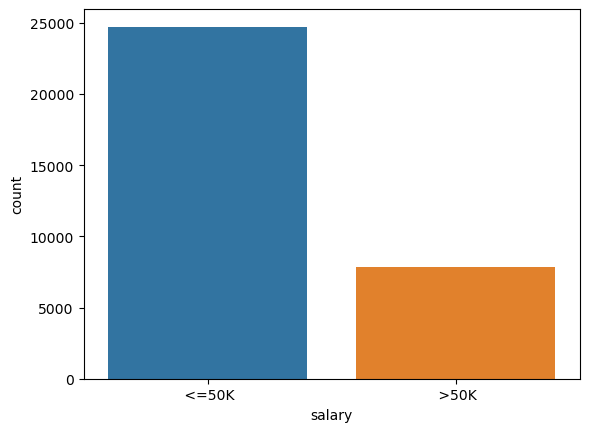

In [21]:
SalStat = sns.countplot(x=df['salary'])

- 75 % of people's salary status is <=50,000  & 25% of people's salary status is > 50,000
- Data is imbalanced

### Exploring Data ( Visualization )

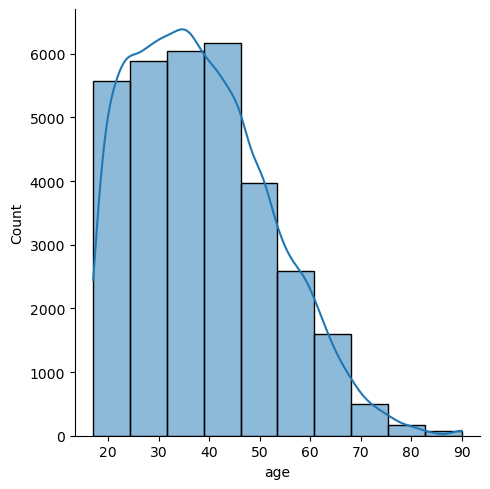

In [22]:
##Histogram of Age
sns.displot(df['age'],bins=10,kde=True)

- People with age 20-45 age are high in frequency

### Box Plot - Age vs Salary status

salary
 <=50K    34.0
 >50K     44.0
Name: age, dtype: float64

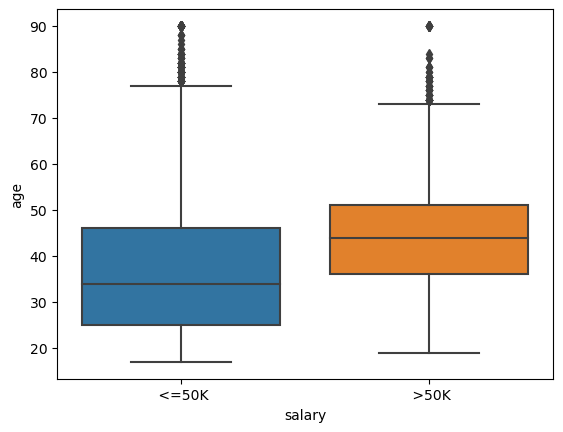

In [23]:
sns.boxplot(x='salary',y='age',data=df)
df.groupby('salary')['age'].median()

- People with 35-50 age are more likely to earn > 50000 USD p.a
- People with 25-35 age are more likely to earn <= 50000 USD p.a

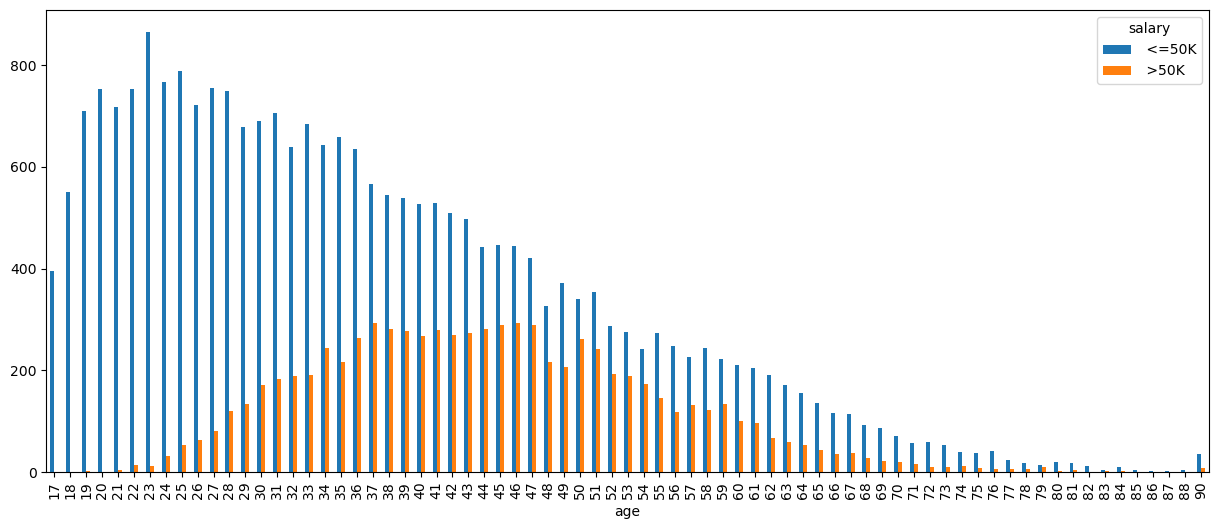

In [24]:
crosstb = pd.crosstab(df.age, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

1. We infer that **min** salary of most of the population is in their 20's which is a valid as it is the starting time of a career
2. **Age** and **Salary** are in direct proportion with each other.
3. The data is left skewed as there are a very few people who work after 60's,therefore,the chances of salary being more than 50k is very less.

### Ocuupation

salary,<=50K,>50K
occupation,,
Adm-clerical,86.6,13.4
Armed-Forces,88.9,11.1
Craft-repair,77.3,22.7
Exec-managerial,51.6,48.4
Farming-fishing,88.4,11.6
Handlers-cleaners,93.7,6.3
Machine-op-inspct,87.5,12.5
Other-service,95.8,4.2
Priv-house-serv,99.3,0.7


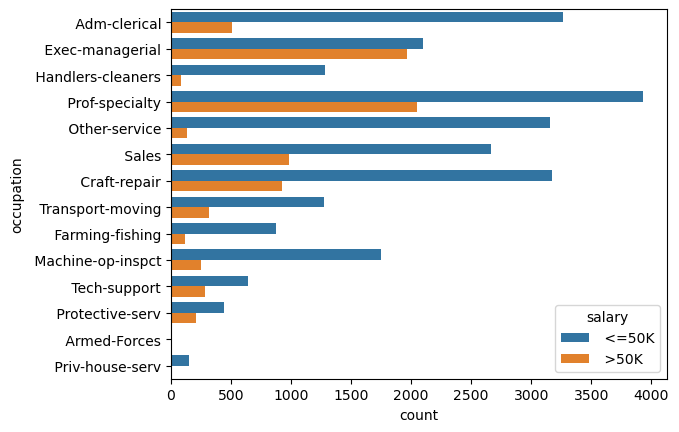

In [25]:
Occupation     = sns.countplot(y=df['occupation'],hue = 'salary', data=df)
Occupation_salstat =pd.crosstab(index = df["occupation"],columns = df['salary'], margins = True, normalize =  'index')  
round(Occupation_salstat*100,1)

- Population is distributed in all of the occupational fields with minimum in armed forces & maximum in prof-speciality.
- Being in an executive managerial position gives almost equal chances of getiing a <= or > 50k salary.
- Being a prof-Specialty and executive managerial there is high chance of earning >50K as compared to other fields




### Education

salary,<=50K,>50K
education,,
10th,93.4,6.6
11th,94.9,5.1
12th,92.4,7.6
1st-4th,96.4,3.6
5th-6th,95.2,4.8
7th-8th,93.8,6.2
9th,94.7,5.3
Assoc-acdm,75.2,24.8
Assoc-voc,73.9,26.1


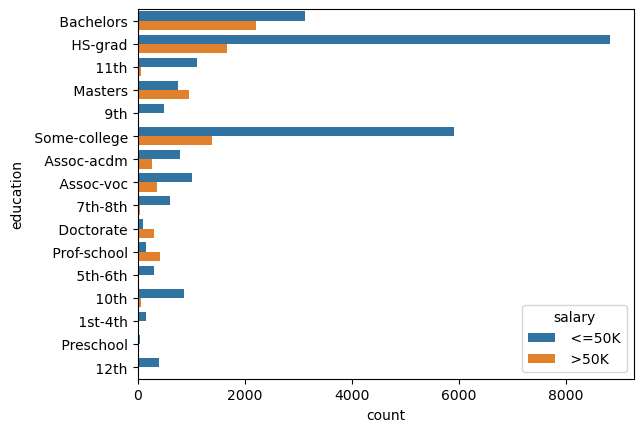

In [26]:
Education   = sns.countplot(y=df['education'],hue = 'salary', data=df)
EdType_salstat = pd.crosstab(index = df["education"], columns = df['salary'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)


We infer that the population is broadly divided into three groups:

   - Bachelors: A person having a bachelors degree has 60:40 chances of getting <= or > 50 k salary.
   - HS-grad: A person being a highschool graduate has 95:05 chances of getting <= or > 50 k salary. As most of the population is concentrated in highschool passout this reflects that most of the people do not cotinue their studies after school.
   - Some-college: A person attended a college but has no degree is certainly likely to have 75:25 chances of getting <= or > 50 k salary. Surprisingly their are good number of people in this category which is a huge liability to the county and the person itself as they're not getting jobs according to their capabilites.

Another noticable thing is that only a very few pople complete their masters but one with that degree have a 45:55 chance of getting <= or > 50 k salary.


### WorkClass

salary,<=50K,>50K
workclass,,
Federal-gov,61.4,38.6
Local-gov,70.5,29.5
Never-worked,100.0,0.0
Private,79.0,21.0
Self-emp-inc,44.3,55.7
Self-emp-not-inc,71.5,28.5
State-gov,72.8,27.2
Without-pay,100.0,0.0
All,75.9,24.1


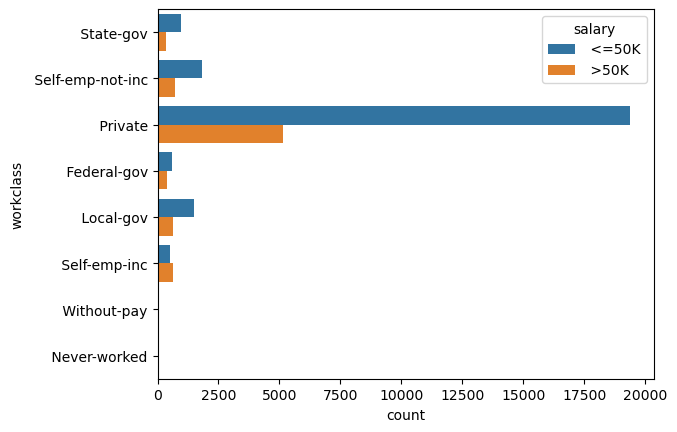

In [27]:
Workclass   = sns.countplot(y=df['workclass'],hue = 'salary', data=df)
Workclass_salstat = pd.crosstab(index = df["workclass"], columns = df['salary'],margins = True,normalize ='index')  
round(Workclass_salstat*100,1)

1. We infer that salary of most of the population be it <= or > 50k is occupied by the Private sector.
2.    Only a very few people belonging to private sector have a salary >50k, but it is still more than the sum total of all other sectors recieving salary >50k.
3.    A self-employed person that is a buisnessman has slighlty more chances of getting >50k salary.



### Country

In [28]:
Country_salstat = pd.crosstab(index = df["country"], columns = df['salary'],margins = True,normalize ='index')  
round(Country_salstat*100,1)

salary,<=50K,>50K
country,,
Cambodia,63.2,36.8
Canada,67.8,32.2
China,73.3,26.7
Columbia,96.6,3.4
Cuba,73.7,26.3
Dominican-Republic,97.1,2.9
Ecuador,85.7,14.3
El-Salvador,91.5,8.5
England,66.7,33.3


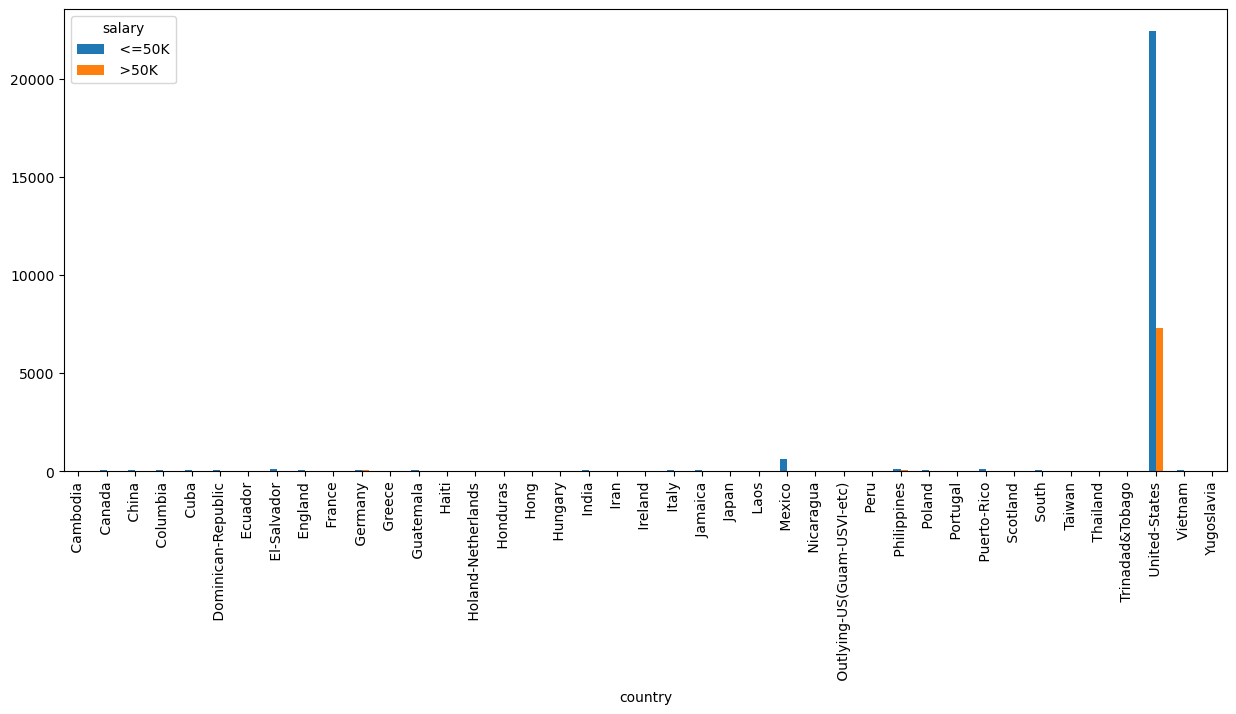

In [29]:
crosstb = pd.crosstab(df.country, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

The only country having max population is United-States where 75:25 is the chance of getting <= or > 50 k salary.

### Capital_Gain and Capital loss

<Axes: xlabel='capital-gain', ylabel='Density'>

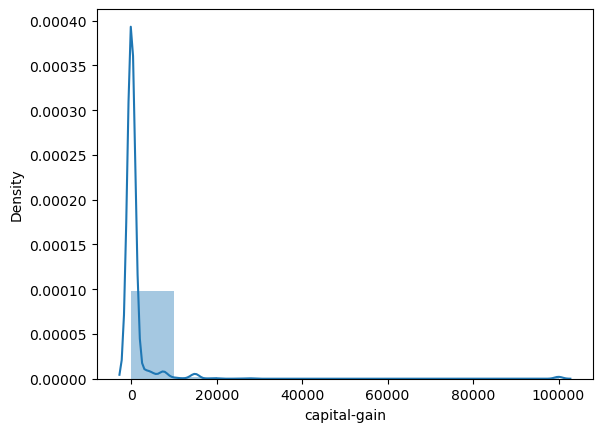

In [30]:
sns.distplot(df['capital-gain'], bins = 10, kde = True)



<Axes: xlabel='capital-loss', ylabel='Density'>

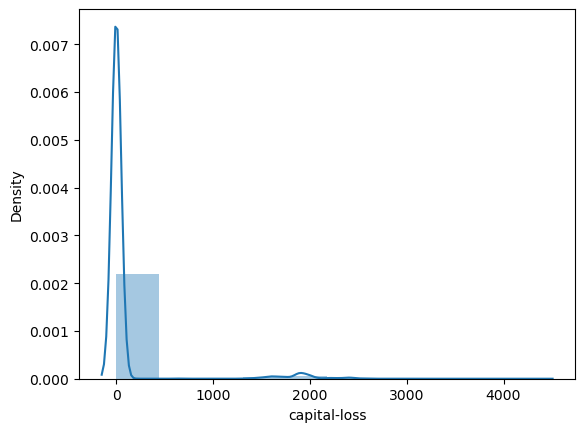

In [31]:
sns.distplot(df['capital-loss'], bins = 10, kde = True)

 ### Race & Salary

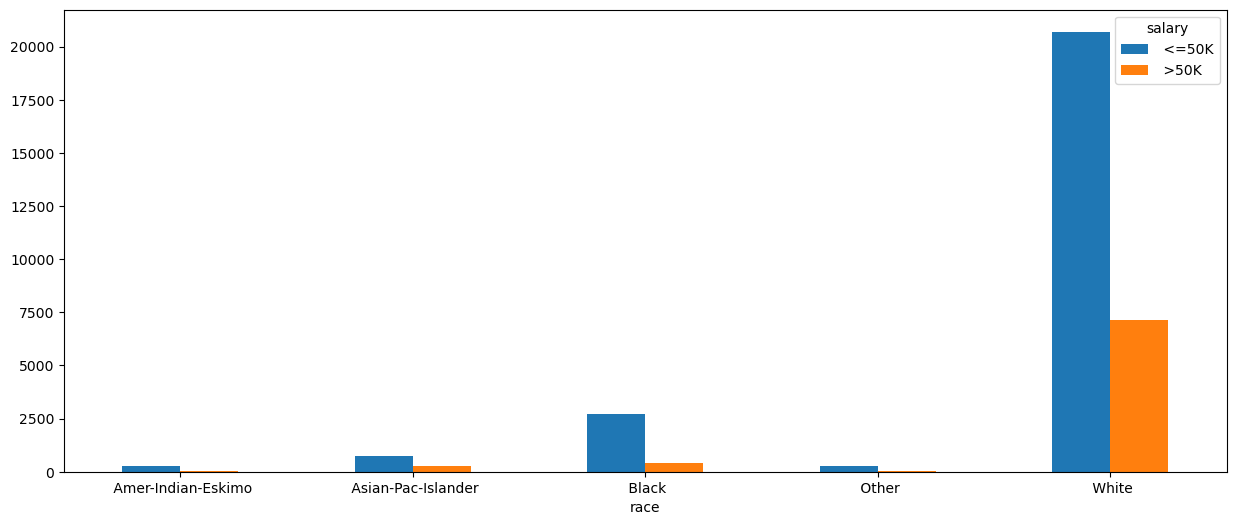

In [32]:
crosstb = pd.crosstab(df.race, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

- Most of the population is white and has 75:25 chance of getting <= or > 50 k salary.

### Hours Per Week & Salary

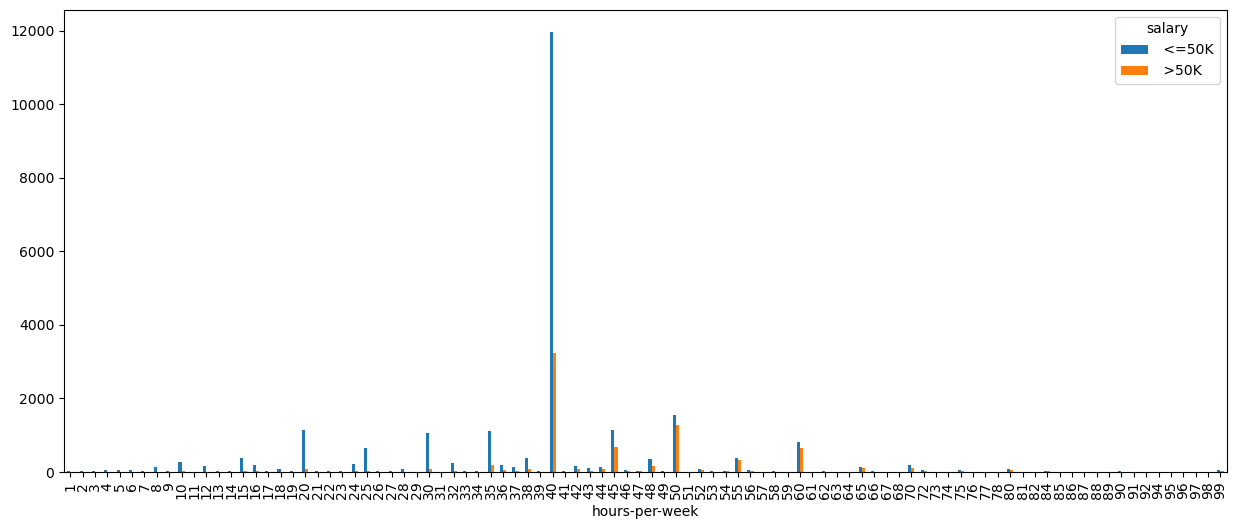

In [33]:
crosstb = pd.crosstab(df["hours-per-week"], df.salary)
barplot = crosstb.plot.bar(rot=0,figsize=(15,6))
plt.xticks(rotation = 90)
plt.show()

Most of the people work for 40 hours per week

### Marital Status & Salary

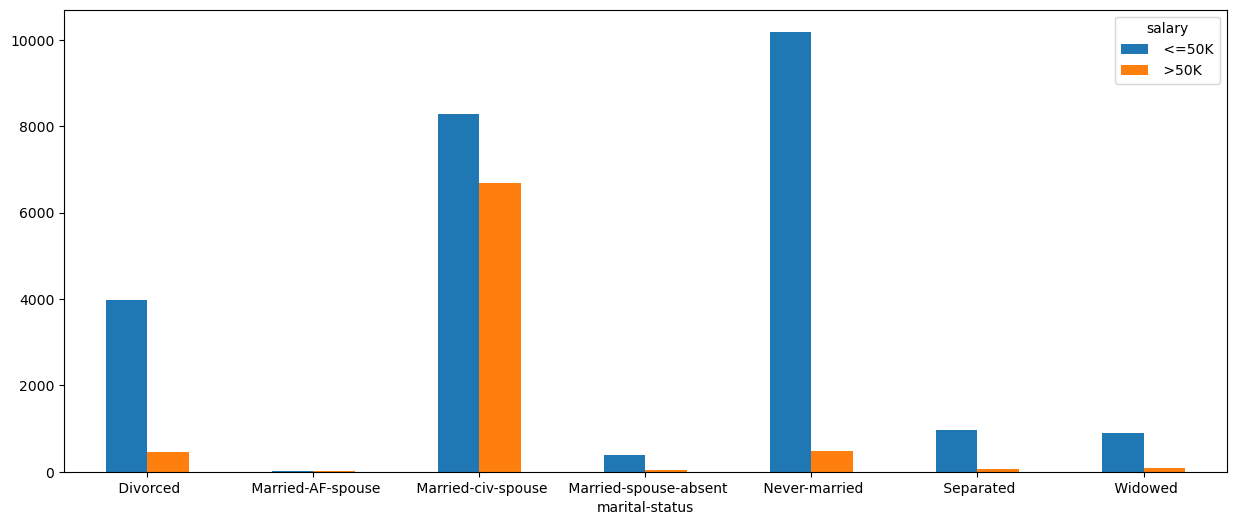

In [34]:
crosstb = pd.crosstab(df["marital-status"], df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

We infer that the population is broadly divided into three groups:

   1. Divorced: A divorced person has 90:10 chances of getting <= or > 50 k salary.
   2. Married-civ-spouse: A person married to a civillian spouse has 53:47 chances of getting <= or > 50 k salary. People in this domain are almost equal in number.
   3. Never-married: A person who has never married has 95:05 chances of getting <= or > 50 k salary. Most of the population is concentrated in this domain. ​ 

Another noticable thing is that people who marry a spouse in armed forcues have and equal chance of getting <= or > 50 k salary.



### Gender & Salary

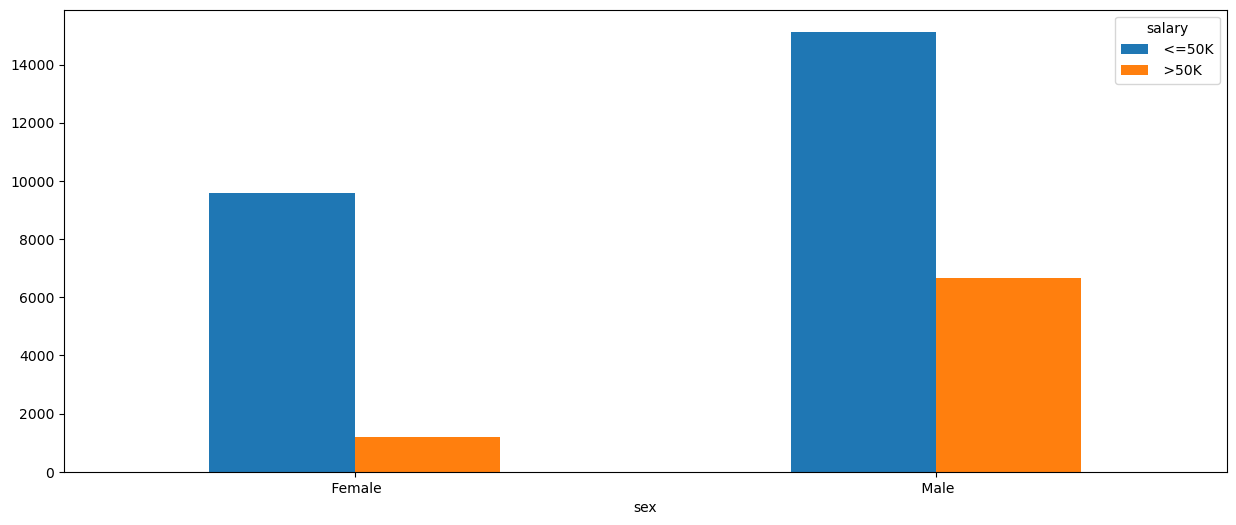

In [35]:
crosstb = pd.crosstab(df.sex, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

- Most of the earning populations is male and has 70:30 chance of getting <= or > 50 k salary.
- Females have 90:10 chance of getting <= or > 50 k salary.
- Gender discrimination can clearly be seen.

### Relationship & Salary

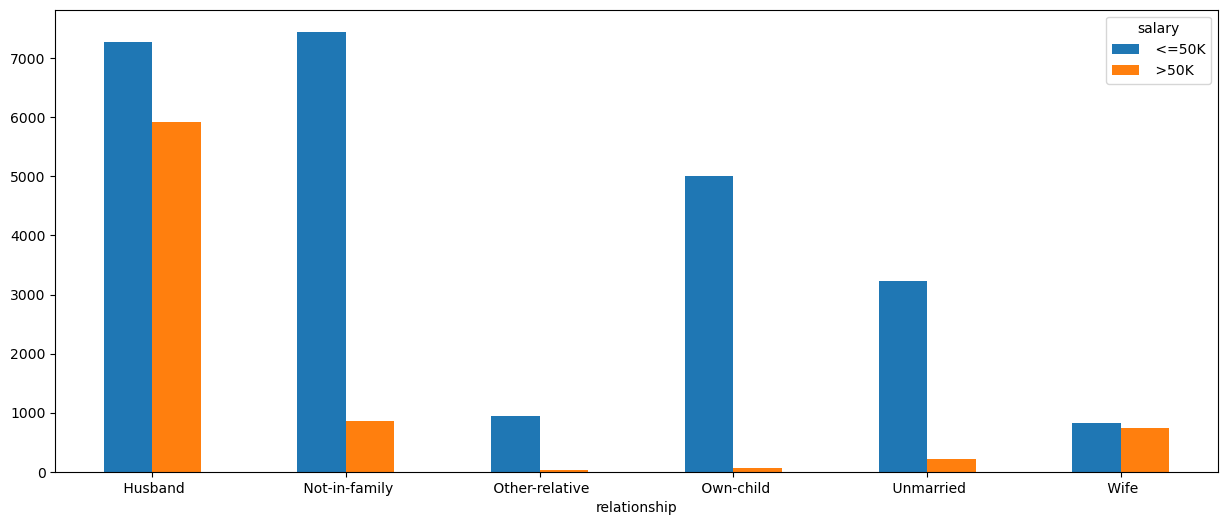

In [36]:
crosstb = pd.crosstab(df.relationship, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. Most of the people who are earning lie in the category of husbands. They have a 55:45 chances of getting <= or > 50 k salary.
2. A person being an earning wife has equal chances of getting <= or > 50 k salary

### Education number,Race & Salary

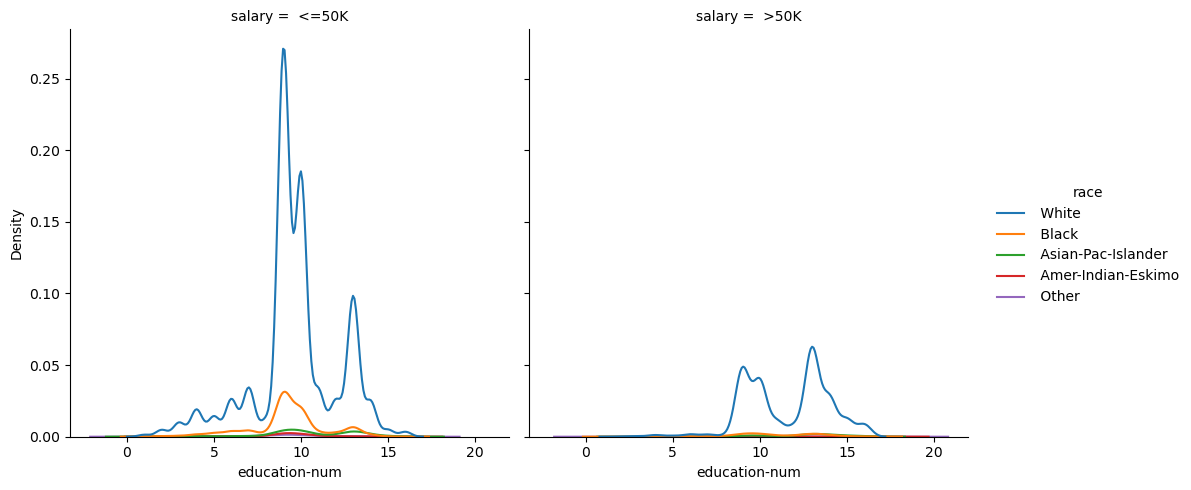

In [37]:
sns.displot(data=df, x=df["education-num"], hue=df["race"], col=df["salary"], kind="kde")

1. Most of the people who are white recieve education for around 9 years and get a salary of <=50 k.
2. Very few white people seem to get education for around 13 years and recieve a salary of >50 k.
3. All other races do not get that much education and therefore have low salary.

### Hours per week,relationship & Salary

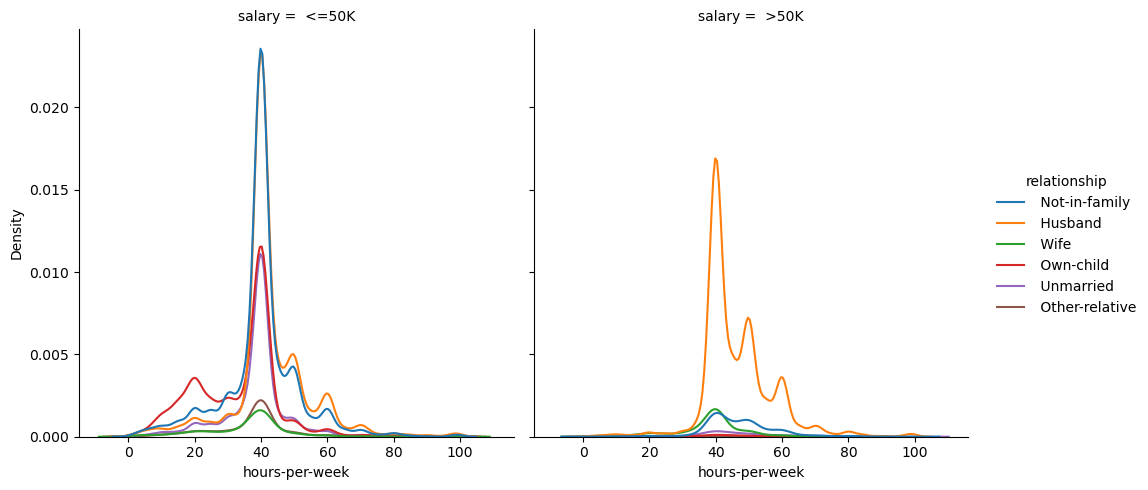

In [38]:
sns.displot(data=df, x=df["hours-per-week"], hue=df["relationship"], col=df["salary"], kind="kde")

1. Most of the people who are not in family work for around 40 hours per week and get a salary of <=50 k.
2. People who have a relationship of husband work for around 40 hours per week and recieve a salary of >50 k.